In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodel to run regression
import statsmodels.formula.api as sm
import seaborn as sns
# set sns layout
sns.set(style="darkgrid")

In [2]:
# read data from csv file
# the invalid_values are values that need to be treated as missing values
invalid_values = ['-',' -   ']

csv_data = pd.read_csv('modeling.csv', na_values=invalid_values)

In [3]:
# assign csv_data to data frame var named 'df'
df = pd.DataFrame(csv_data)

In [4]:
# show some data
print('First 5 rows')
df.head()

,id,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf_total,tfp,exp_irrigation,...,exp_pss,exp_mds,exp_esets,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets
0,1,1971,NaN,6321,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1972,NaN,6863,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1973,NaN,7766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1974,NaN,7684,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1973,NaN,7766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('Last 5 rows')
df.tail()

,id,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf_total,tfp,exp_irrigation,...,exp_pss,exp_mds,exp_esets,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets
45,46,2015,1170256.0,11294,99286.0,5444.0,221.0,104952.0,1054011.0,1496.0,...,5504.0,214.0,2212.0,107.0,14.0,29.0,12.0,51.0,2.0,21.0
46,47,2016,1210438.0,11064,102845.0,6524.0,410.0,109779.0,1089595.0,1355.0,...,6311.0,158.0,2081.0,108.0,13.0,27.0,11.0,58.0,1.0,19.0
47,48,2017,1327952.0,10261,106255.0,9907.0,524.0,116686.0,1201005.0,3292.0,...,6527.0,163.0,3180.0,112.0,30.0,40.0,11.0,59.0,1.0,29.0
48,49,2018,1400390.0,9998,111286.0,10355.0,600.0,122240.0,1268152.0,2637.0,...,8504.0,187.0,3246.0,117.0,22.0,37.0,12.0,73.0,2.0,28.0
49,50,2019,1323806.0,8622,NaN,9299.0,589.0,9888.0,1305296.0,NaN,...,NaN,NaN,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# check data types
print('Check the datatypes')
df.dtypes

id                   int64
year                 int64
gva_agri           float64
employment_agri      int64
bsod               float64
machineries        float64
tractors           float64
dcf_total          float64
tfp                float64
exp_irrigation     float64
exp_postharvest    float64
exp_other_infra    float64
exp_rd             float64
exp_pss            float64
exp_mds            float64
exp_esets          float64
cpi                float64
def_irrigation     float64
def_postharvest    float64
def_rd             float64
def_pss            float64
def_mds            float64
def_esets          float64
dtype: object

In [9]:
# change data type
df['def_irrigation'] = df['def_irrigation'].astype('float64')
df['def_postharvest'] = df['def_postharvest'].astype('float64')
# df.dtypes

id                   int64
year                 int64
gva_agri           float64
employment_agri      int64
bsod               float64
machineries        float64
tractors           float64
dcf_total          float64
tfp                float64
exp_irrigation     float64
exp_postharvest    float64
exp_other_infra    float64
exp_rd             float64
exp_pss            float64
exp_mds            float64
exp_esets          float64
cpi                float64
def_irrigation     float64
def_postharvest    float64
def_rd             float64
def_pss            float64
def_mds            float64
def_esets          float64
dtype: object

In [10]:
print('Summary of the data')
df.describe()

,id,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf_total,tfp,exp_irrigation,...,exp_pss,exp_mds,exp_esets,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets
count,50.00000,50.000000,2.200000e+01,50.000000,21.000000,22.000000,22.000000,22.000000,2.200000e+01,18.000000,...,18.000000,18.000000,18.000000,26.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,25.50000,1994.460000,8.421958e+05,10166.200000,100288.904762,2719.772727,313.500000,98763.545455,7.321964e+05,4399.166667,...,4188.666667,145.388889,1791.444444,79.461538,58.777778,30.277778,10.277778,45.944444,1.666667,20.277778
std,14.57738,14.606694,3.520185e+05,1624.039446,5649.100901,3306.948729,196.905283,21212.621875,3.541838e+05,4317.066368,...,2142.009172,70.075706,868.515652,25.227336,64.496745,14.364194,6.066354,19.114122,0.907485,10.637368
min,1.00000,1971.000000,3.562110e+05,6321.000000,89050.000000,385.000000,167.000000,9888.000000,2.559960e+05,209.000000,...,1811.000000,22.000000,491.000000,39.000000,2.000000,4.000000,3.000000,25.000000,0.000000,7.000000
25%,13.25000,1982.250000,4.975822e+05,9302.250000,97629.000000,637.000000,205.500000,98792.500000,3.838205e+05,1284.500000,...,2477.000000,88.750000,964.750000,59.750000,12.250000,25.250000,6.250000,30.250000,1.000000,11.000000
50%,25.50000,1994.500000,8.540590e+05,10332.000000,99286.000000,950.000000,225.500000,101707.000000,7.406940e+05,2964.500000,...,3786.500000,156.500000,1932.000000,78.000000,26.000000,28.500000,8.500000,40.500000,2.000000,18.500000
75%,37.75000,2006.750000,1.151675e+06,11298.500000,102205.000000,2740.500000,323.500000,104447.250000,1.036260e+06,6759.250000,...,5398.000000,199.000000,2249.500000,102.250000,86.500000,32.750000,11.750000,56.250000,2.000000,27.250000
max,50.00000,2019.000000,1.400390e+06,12960.000000,111286.000000,10355.000000,975.000000,122240.000000,1.305296e+06,13240.000000,...,8504.000000,267.000000,3246.000000,120.000000,206.000000,74.000000,27.000000,94.000000,4.000000,42.000000


In [11]:
# define x and y
y = df['gva_agri']
x = df['year']

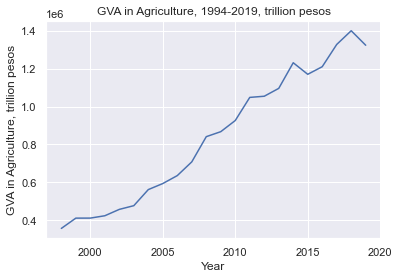

In [12]:
print('Plot dependent variable over the years')
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('GVA in Agriculture, trillion pesos')
plt.title('GVA in Agriculture, 1994-2019, trillion pesos')
plt.show()

In [13]:
new_df = df.loc[df['year'] > 1997]

In [15]:
# describe the new data
print('Retrieve sample data for 1997-2019 since some data are missing from previous years')
new_df.describe()

,id,year,gva_agri,employment_agri,bsod,machineries,tractors,dcf_total,tfp,exp_irrigation,...,exp_pss,exp_mds,exp_esets,cpi,def_irrigation,def_postharvest,def_rd,def_pss,def_mds,def_esets
count,22.000000,22.000000,2.200000e+01,22.000000,21.000000,22.000000,22.000000,22.000000,2.200000e+01,18.000000,...,18.000000,18.000000,18.000000,22.0000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,39.500000,2008.500000,8.421958e+05,11235.863636,100288.904762,2719.772727,313.500000,98763.545455,7.321964e+05,4399.166667,...,4188.666667,145.388889,1791.444444,86.0000,58.777778,30.277778,10.277778,45.944444,1.666667,20.277778
std,6.493587,6.493587,3.520185e+05,1002.678855,5649.100901,3306.948729,196.905283,21212.621875,3.541838e+05,4317.066368,...,2142.009172,70.075706,868.515652,21.5495,64.496745,14.364194,6.066354,19.114122,0.907485,10.637368
min,29.000000,1998.000000,3.562110e+05,8622.000000,89050.000000,385.000000,167.000000,9888.000000,2.559960e+05,209.000000,...,1811.000000,22.000000,491.000000,52.0000,2.000000,4.000000,3.000000,25.000000,0.000000,7.000000
25%,34.250000,2003.250000,4.975822e+05,10504.000000,97629.000000,637.000000,205.500000,98792.500000,3.838205e+05,1284.500000,...,2477.000000,88.750000,964.750000,65.7500,12.250000,25.250000,6.250000,30.250000,1.000000,11.000000
50%,39.500000,2008.500000,8.540590e+05,11297.000000,99286.000000,950.000000,225.500000,101707.000000,7.406940e+05,2964.500000,...,3786.500000,156.500000,1932.000000,87.5000,26.000000,28.500000,8.500000,40.500000,2.000000,18.500000
75%,44.750000,2013.750000,1.151675e+06,12011.500000,102205.000000,2740.500000,323.500000,104447.250000,1.036260e+06,6759.250000,...,5398.000000,199.000000,2249.500000,105.2500,86.500000,32.750000,11.750000,56.250000,2.000000,27.250000
max,50.000000,2019.000000,1.400390e+06,12960.000000,111286.000000,10355.000000,975.000000,122240.000000,1.305296e+06,13240.000000,...,8504.000000,267.000000,3246.000000,120.0000,206.000000,74.000000,27.000000,94.000000,4.000000,42.000000


In [16]:
# define the ols
result = sm.ols(formula='gva_agri ~ year + employment_agri + bsod + machineries + tractors',data=new_df).fit()

In [17]:
print('Result of regression analysis')
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               gva_agri   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     259.3
Date:                Sun, 24 May 2020   Prob (F-statistic):           5.25e-14
Time:                        10:39:02   Log-Likelihood:                -250.03
No. Observations:                  21   AIC:                             512.1
Df Residuals:                      15   BIC:                             518.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.101e+08   8.03e+06    -

In [28]:
# x and y corresponds to name of column, which is mapped to the dataset
def plot(x, y):
    sns.regplot(x, y, data=new_df)
    plt.show(sns)

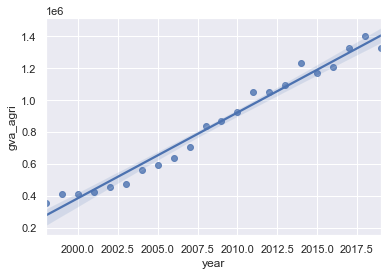

In [29]:
print('GVA agri vs Year')
plot('year','gva_agri')

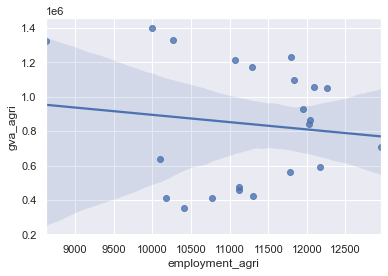

In [30]:
print('GVA agri vs Employment in agri')
plot('employment_agri','gva_agri')

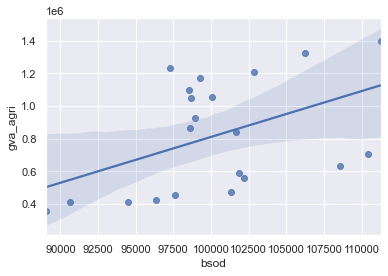

In [31]:
print('GVA agri vs BSOD')
plot('bsod','gva_agri')

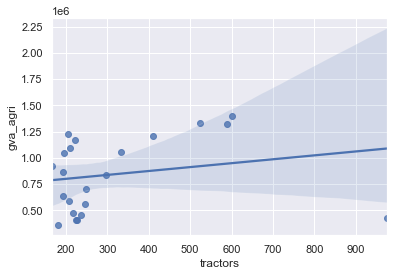

In [32]:
print('GVA agri vs Tractors')
plot('tractors','gva_agri')

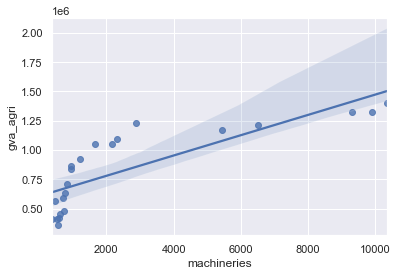

In [33]:
print('GVA agri vs Machineries')
plot('machineries','gva_agri')